# Final Project

Group Number: 070  
Project Title: How to survive University  
Team Name: Zuckerborgs  
Team Member:  
Sarah Bender-Resnik                  solsabrsk   
Da Gong                              Dagong3706            
Christian Lim                        christianxlim              
Alex Phan                            APhan1337               
Yushan Wang                          YushanWang9801               
Jiemin Tang                          jiemintang 

# PID:

Da Gong                A15087556 

Yushan Wang            A14459085 

Jiemin Tang            A13948547

Christian Lim          A15710032

Alex Phan              A12998302

Sarah Bender-Resnik    A12891790

# Background: 
Every year, there are three million freshman students in the United States trying to choose their most desirable college among the offers they received, and it is a tedious process without doubt. According to the College Scorecard Data provided by the U.S. Department of Education, there are 6418 colleges in the United States, and these colleges can be divided into three major types: Private for-profit, Private nonprofit, and Public. 

# Overview

We deployed the dataset from the U.S. Department of Education. From the data source we found, we researched the relationship between multiple educational areas and SAT scores. 


# Research questions and Hypothesis list

Q1: Is there a strong relation existed between average admission sat score of a school and its on-time completion rate?

Q2: What is the relationship between college size and its average completion rate?

Q3: What is the relationship between college type and its average completion rate?

Q4: What is the relationship between college's predominant degree type and its average completion rate?

Q5: What type of college should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?

Q6: What type of Predominant degrees-awarded school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?

Q7: What size of school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?

Q8: What kind of school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?

Q9: What kind of school should one student apply since he/she will highly likely to get a offer easily according to his/her SAT score?

Q10: What average annual net-cost of attendance in college would applicants expect to pay according to his/her SAT score?

Q11: What is the probability that an applicant can graduate on-time from college based on his/her SAT score?


Each question would be answered in below specifically.

# Pre Import

In [1]:
#import all the packages needed for the project

import numpy as np
import pandas as pd
import os
import scipy.stats as stats

#import all the packages needed for data visualization

%matplotlib inline
import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Data source

This is the website provided by the U.S. Department of Education.: https://collegescorecard.ed.gov/
This website allows users to check detailed information of one specific college using the search engine it provides.

This is the download page of College Scorecard Data provided by the U.S. Department of Education.: https://collegescorecard.ed.gov/data/
This website allows users to download all college information in the U.S. to execute further data analysis or information gaining. This dataset will be transferred into the pandas table and provide everything we need for our project. 

CollegeScorecardDataDictionary.xlsx is the dictionary for the meaning of number and column name appeared in the dataset which is provided with College Scorecard Data from the download page https://collegescorecard.ed.gov/data/.
This excel will help this project by telling user what these number and column names stand for in dataset.

# Import Database needed for the project

In [2]:
college_path = os.path.join('data', 'MERGED2016_17_PP.csv')
college = pd.read_csv(college_path)
#preview of partial data 
college.head(5)

,UNITID,OPEID,OPEID6,INSTNM,ZIP,CITY,STABBR,LATITUDE,LONGITUDE,INSTURL,...,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,PCTFLOAN,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,35762,Normal,AL,34.783368,-86.568502,www.aamu.edu/,...,0.5774,NaN,0.309,NaN,0.7667,32750,348.16551225731,0.2531554273,NaN,0.2913
1,100663,105200,1052,University of Alabama at Birmingham,35294-0110,Birmingham,AL,33.505697,-86.799345,www.uab.edu,...,0.8007,NaN,0.5178,NaN,0.5179,21833,232.106797835537,0.513963161,NaN,0.5384
2,100690,2503400,25034,Amridge University,36117-3553,Montgomery,AL,32.362609,-86.174010,www.amridgeuniversity.edu,...,PrivacySuppressed,NaN,PrivacySuppressed,NaN,0.8436,22890,243.343773299842,0.2307692308,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,35899,Huntsville,AL,34.724557,-86.640449,www.uah.edu,...,0.8161,NaN,0.5116,NaN,0.4312,22647,240.760438353933,0.5485090298,NaN,0.4905
4,100724,100500,1005,Alabama State University,36104-0271,Montgomery,AL,32.364317,-86.295677,www.alasu.edu,...,0.6138,NaN,0.5313,NaN,0.8113,31500,334.876752247489,0.2185867473,NaN,0.2475


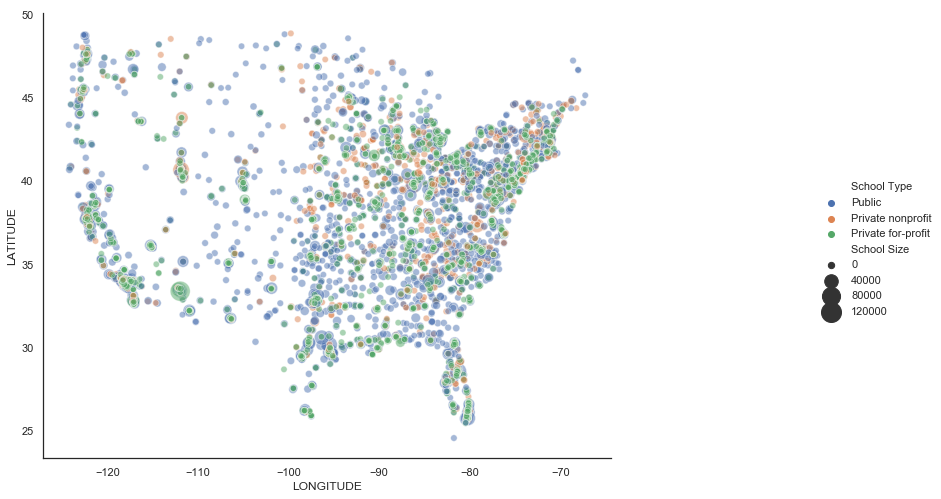

In [3]:
#use seaborn to show the scattering colleges in the United States of America
df=college[['CONTROL','LONGITUDE','LATITUDE','UGDS']]
df=df[(df['LONGITUDE']>-130) & (df['LONGITUDE']<-60)]
df=df[(df['LATITUDE']>23) & (df['LATITUDE']<55)]
sns.set(style="white")
control = ["Public", "Private nonprofit", "Private for-profit"]
#translate column name and number to show what it represents for
temp=[]
for i,value in df['CONTROL'].iteritems():
    if value==1:
        temp.append(control[0])
    if value==2:
        temp.append(control[1])
    if value==3:
        temp.append(control[2])
df['CONTROL']=temp
df=df.rename(columns={'UGDS':'School Size','CONTROL':'School Type'})
#plot the picture
a=sns.color_palette()[0:3]
g=sns.relplot(x="LONGITUDE", y="LATITUDE", hue="School Type", size="School Size",
            sizes=(40, 400), alpha=.5, palette=a,
            height=4, data=df)
g.fig.set_size_inches(15,8)

From the above scatterplot, it is clear that colleges are scattered everywhere in the United States, which makes choosing one especially hard. Although every student prefers to going to a college that is highly reputable such as Harvard and UCB, the rate of acceptance is as low as 5.4% and 16.9% in 2019 for these two colleges. Therefore, students have to prove that they are qualified for those good colleges using their SAT, ACT score, GPA, and their family fortune. 
In order to help these applicants make their choice of college wisely, a successful guide generated from all college data would help them a lot in the application as well as save their time in finding every college.


Above all, we decided to generate a successful application guide from analyzing the College Scorecard. We will analyze the relationship between students’ SAT score , College’s completion rate, College’s type, College’s student’s size, and College’s average salary for its graduate students and give students some advice for their application.


# Data Cleaning and Necessary Data Loading

## Reasons for data cleaning

there are only selected columns from the data set would be used in our researches. We would like to extract the useful data from the dataframe, and in the coding, readers would be able to see which specific columns were extratced. Since the SAT scores, discussed in the topic, do not have cumulative scores in the dataset, then we have to use math and readings to calculate the cumulative scores. 

In [4]:
#Do some normal data cleaning processes and load data we needed in this project
df=college[['OPEID','CONTROL','UGDS','PREDDEG','SATVR25', 'SATVR75',\
           'SATMT25','SATMT75','SATVRMID','SATMTMID',\
            'C150_L4_POOLED_SUPP','C150_4_POOLED_SUPP']].dropna(subset=['SATVR25', 'SATVR75',\
           'SATMT25','SATMT75','SATVRMID','SATMTMID']).\
            replace('PrivacySuppressed',0).fillna(0)
df['COMPLETION RATE']=df['C150_L4_POOLED_SUPP'].astype(float)+df['C150_4_POOLED_SUPP'].astype(float)
df.drop(['C150_L4_POOLED_SUPP','C150_4_POOLED_SUPP'],inplace=True,axis=1)
df=df[df['COMPLETION RATE']>0].reset_index(drop=True)
df['SATCM25'] = df['SATVR25'] + df['SATMT25'] 
df['SATCM75'] = df['SATVR75'] + df['SATMT75'] 
df['SATCMMID'] = df['SATVRMID'] + df['SATMTMID'] 
temp=df.groupby('SATCMMID')['COMPLETION RATE'].describe()
df.head(5)

,OPEID,CONTROL,UGDS,PREDDEG,SATVR25,SATVR75,SATMT25,SATMT75,SATVRMID,SATMTMID,COMPLETION RATE,SATCM25,SATCM75,SATCMMID
0,100200,1,4616,3,380.0,470.0,370.0,470.0,425.0,420.0,0.2913,750.0,940.0,845.0
1,105200,1,12047,3,480.0,640.0,490.0,660.0,560.0,575.0,0.5384,970.0,1300.0,1135.0
2,105500,1,6346,3,520.0,660.0,540.0,680.0,590.0,610.0,0.4905,1060.0,1340.0,1200.0
3,100500,1,4704,3,370.0,460.0,360.0,460.0,415.0,410.0,0.2475,730.0,920.0,825.0
4,105100,1,31663,3,490.0,610.0,490.0,620.0,550.0,555.0,0.6793,980.0,1230.0,1105.0


# Explain of Variable Name:

OPEID: 8-digit OPE ID for institution

CONTROL: Control of institution 

UGDS: Enrollment of undergraduate certificate/degree-seeking students

PREDDEG: Predominant undergraduate degree awarded

SATVR25: 25th percentile of SAT scores at the institution (critical reading)

SATVR75: 75th percentile of SAT scores at the institution (critical reading)

SATMT25: 25th percentile of SAT scores at the institution (math)

SATMT75: 75th percentile of SAT scores at the institution (math)

SATVRMID: Midpoint of SAT scores at the institution (critical reading)

SATMTMID: Midpoint of SAT scores at the institution (math)

COMPLETION RATE: Completion rate for first-time, full-time students at four-year institutions 

SATCM25: 25th percentile of SAT scores at the institution

SATCM75: 75th percentile of SAT scores at the institution

SATCMMID: Midpoint of SAT scores at the institution

# Helper Functions for the Project

In [5]:
#This function can translate variable name in dataset into readble name
def translation_dict(datadict):
    df=datadict.copy()
    df=df.dropna(subset=['VALUE','LABEL'])
    df.loc[:,'VARIABLE NAME']=df.loc[:,'VARIABLE NAME'].fillna(method="ffill")
    df=df[['VARIABLE NAME', 'VALUE', 'LABEL']]
    df=df.groupby('VARIABLE NAME')[['VALUE','LABEL']].apply(lambda x:x.set_index('VALUE')['LABEL'].to_dict())
    return df.to_dict()

In [6]:
#This function can calculate the correlation between two variables
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof = 0)
    std_y = (y - y.mean())/y.std(ddof = 0)
    return (std_x * std_y).mean()

In [7]:
#This function can translate SAT score from real average score into scores with bin of 50
def new_sat_score(df,name_of_score):
    new_sat=[]
    for ind, val in df[name_of_score].items():
        temp=val//50
        temp*=50
        new_sat.append(temp)
    return pd.Series(new_sat)
    

In [8]:
#show the highest graduate rate combination of college's control type, size and PREDDEG type using certain sat score
def easy_graduate(SAT_SCORE):
    df2=df.copy()
    df2['SATCMMID']=new_sat_score(df2,'SATCMMID')
    df2=df2[df2['SATCMMID']==SAT_SCORE]
    temp=df2.groupby(['CONTROL','UGDS','PREDDEG'])['COMPLETION RATE'].mean()
    temp=pd.DataFrame(temp)
    largest=max(temp.values)
    for condition,value in temp.iterrows():
        if value.values[0]==largest:
            return str('A '+condition[0].lower()+', '+condition[1].lower()+', '+condition[2].lower()+' school.')

In [9]:
#show the highest admission rate of college's control type, size and PREDDEG type using certain sat score
def easy_apply(SAT_SCORE):
    df2=df.copy()
    df2=df2[df2['SATCMMID']==SAT_SCORE]
    temp=df2.groupby(['CONTROL','UGDS','PREDDEG'])['ADM_RATE'].mean()
    temp=pd.DataFrame(temp)
    largest=max(temp.values)
    for condition,value in temp.iterrows():
        if value.values[0]==largest:
            return str('A '+condition[0].lower()+', '+condition[1].lower()+', '+condition[2].lower()+' school.')

In [10]:
#show the average cost per year using certain sat score
def expect_tuition(SAT_SCORE):
    df2=df.copy()
    df2=df2[df2['SATCMMID']==SAT_SCORE]
    return df2['Average_Cost'].mean()

In [11]:
#show the average completion rate using certain sat score
def expect_completion_rate(SAT_SCORE):
    df2=df.copy()
    df2=df2[df2['SATCMMID']==SAT_SCORE]
    return str(df2['C150_4'].mean()*100)+'%'

# Data Science Questions: 


# Question 1:

Is there a strong relation existed between average admission sat score of a school and its on-time completion rate?

Hypothesis:

H0: There is no association between average admission sat score of a school and its on-time completion rate.

H1: There is an association between average admission sat score of a school and its on-time completion rate.

The sat somehow could demonstrate one participant academic level, so we believe that the on-time completion rate would be determined by the average students' academic level in the school.

In [12]:
#import dictionary to translate dataset name and number
datadict_path = os.path.join('data', 'CollegeScorecardDataDictionary.xlsx')
datadict = pd.read_excel(datadict_path, sheet_name='data_dictionary')
dic=translation_dict(datadict)

The correlation between the average sat score of a school and the completion rate is 0.9200815565740299


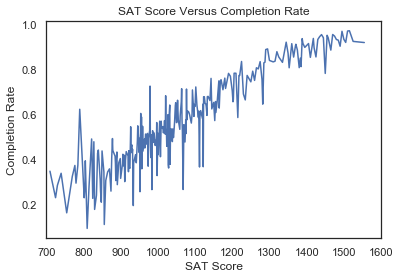

In [13]:
plt.figure(0)
Figure_one=temp['mean'].plot(title='SAT Score Versus Completion Rate',xlim=[700,1600])
Figure_one.set_xlabel('SAT Score')
Figure_one.set_ylabel('Completion Rate')
r=correlation(pd.Series(temp.index.values.tolist()),pd.Series(temp['mean'].values))
print('The correlation between the average sat score of a school and the completion rate is '+str(r))

Since the correlation between the average of student's admission SAT score is positively correlated with the college completion rate, which is as high as 0.92, it is convincing to conclude that higher admission sat score will increase the college's admission rate. 

# Question 2:

What is the relationship between college size and its average completion rate?

Hypothesis:

H0: There is no association between college size and its average completion rate.

H1: There is an association between college size and its average completion rate.

The reason for this hypothesis is similar to question one, since we believe the sat scores would represent one's academic capabilities which would affect the college completion.

In [14]:
#translate using dictionary
df['UGDS']=pd.qcut(df['UGDS'],3,labels=['Small Size','Medium Size','Large Size'])
df['CONTROL']=df['CONTROL'].map(dic['CONTROL'])
df['PREDDEG']=df['PREDDEG'].map(dic['PREDDEG'])

Text(0, 0.5, 'Completion Rate')

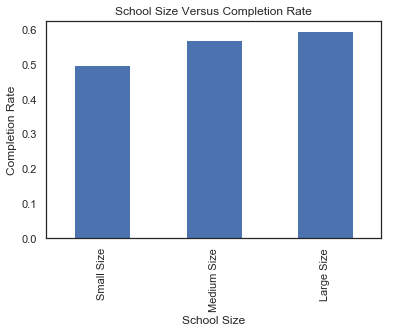

In [15]:
q1=df.groupby('UGDS')['COMPLETION RATE'].describe()
q1=q1[q1['count']>5]
Figure_four=q1['mean'].plot(kind='bar',title='School Size Versus Completion Rate')
Figure_four.set_xlabel('School Size')
Figure_four.set_ylabel('Completion Rate')

ANOVA for Problem 2:

In [16]:
fvalue, pvalue = stats.f_oneway(df['COMPLETION RATE'][df['UGDS'] == 'Small Size'], df['COMPLETION RATE'][df['UGDS'] == 'Medium Size'], df['COMPLETION RATE'][df['UGDS'] == 'Large Size'])
print(fvalue, pvalue)

34.23275459319728 3.4460992778562727e-15


From the figure above, we can see that larger size college has relatively higher completion rate. Therefore, it is reasonable to conclude that, as the size of the college increases, the completion rate also increases.

# Question 3:

What is the relationship between college type and its average completion rate?

Hypothesis:

H0: There is no association between college type and its average completion rate.

H1: There is an association between college type and its average completion rate.

The reason for this hypothesis is similar to question one, since we believe the sat scores would represent one's academic capabilities which would affect the college completion.

Text(0, 0.5, 'Completion Rate')

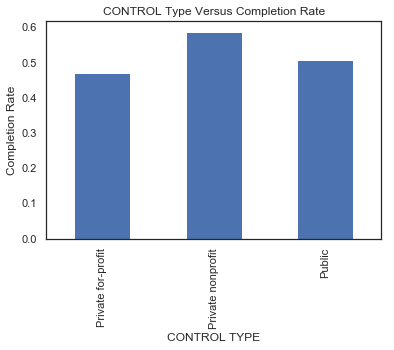

In [17]:
temp2=df.groupby('CONTROL')['COMPLETION RATE'].describe()
temp2=temp2[temp2['count']>5]
Figure_two=temp2['mean'].plot(kind='bar',title='CONTROL Type Versus Completion Rate')
Figure_two.set_xlabel('CONTROL TYPE')
Figure_two.set_ylabel('Completion Rate')

Data analysis (ANOVA) for Problem 3:

In [18]:
fvalue2, pvalue2 = stats.f_oneway(df['COMPLETION RATE'][df['CONTROL'] == 'Private for-profit'], df['COMPLETION RATE'][df['CONTROL'] == 'Private nonprofit'], df['COMPLETION RATE'][df['CONTROL'] == 'Public'])
print(fvalue2, pvalue2)

32.03024450863479 2.7817628419343064e-14


From the figure above, we can see that the complete rate of private nonprofit colleges is significantly higher than public and private for-profit schools. Therefore, we can conclude that the private nonprofit colleges have the highest completion rate among the three types of colleges.

# Question 4:

What is the relationship between college's predominant degree type and its average completion rate?

Hypothesis:

H0: There is no association between college's predominant degree type and its average completion rate.

H1: There is an association between college's predominant degree type and its average completion rate.


Different degree type, from our perspectiuve, stands for different academic abilities. Different abilities would generate an effect to the degree holder's completion. Then we wish to hypothesize there exists a correlation or not.

Text(0, 0.5, 'Completion Rate')

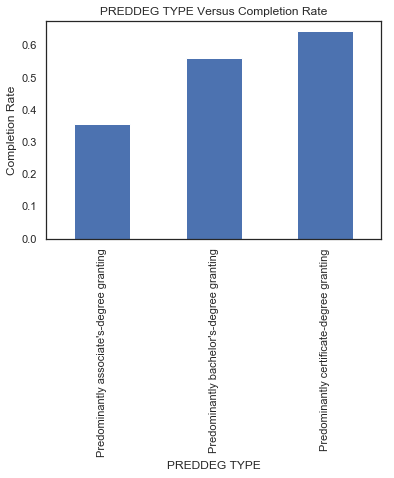

In [19]:
temp3=df.groupby('PREDDEG')['COMPLETION RATE'].describe()
Figure_three=temp3['mean'].plot(kind='bar',title='PREDDEG TYPE Versus Completion Rate')
Figure_three.set_xlabel('PREDDEG TYPE')
Figure_three.set_ylabel('Completion Rate')

ANOVA for Problem 4:

In [20]:
fvalue3, pvalue3 = stats.f_oneway(df['COMPLETION RATE'][df["PREDDEG"] == "Predominantly associate's-degree granting"], 
                                  df['COMPLETION RATE'][df["PREDDEG"] == "Predominantly bachelor's-degree granting"], 
                                  df['COMPLETION RATE'][df["PREDDEG"] == "Predominantly certificate-degree granting"])
print(fvalue3, pvalue3)

20.639707398039807 1.5326253030893095e-09


From the figure above, there is obviously a significant difference between the college's predominant degree granting type and its average completion rate. Among the three types of degrees, the colleges that grant certificate degrees as the predominant type are the ones that have the highest completion rate, while the colleges that grant associate degrees as the predominant type are the ones that have the lowest completion rate.

# Question 5:

What type of college should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?

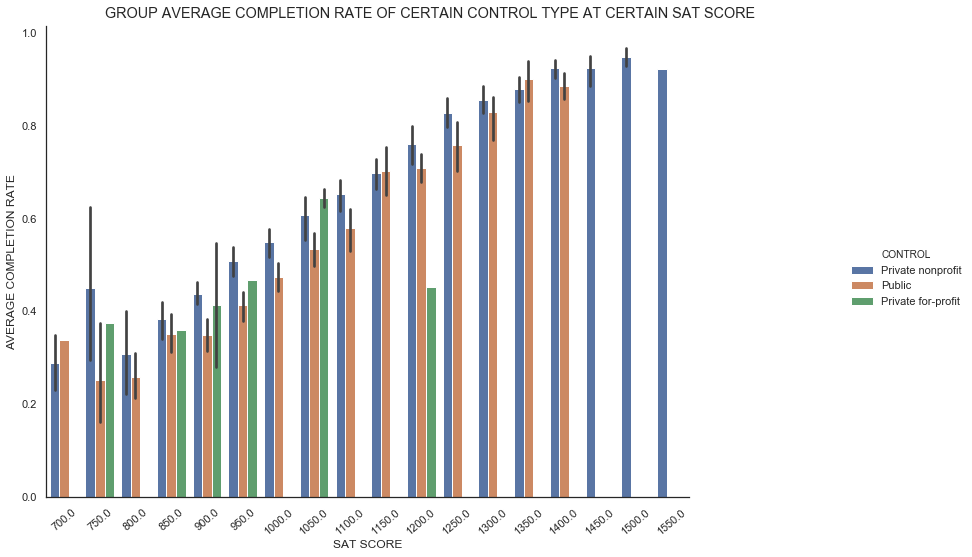

In [21]:
ds=df[df['SATCMMID']>=700][df['SATCMMID']<=1600].groupby(['SATCMMID','CONTROL'])['COMPLETION RATE'].mean()
ds=pd.DataFrame(ds)
temp=[]
for index,value in ds.iterrows():
    temp.append([index[0],index[1],value.values[0]])
ds=pd.DataFrame(temp,columns=['SAT SCORE','CONTROL','AVERAGE COMPLETION RATE'])
ds['SAT SCORE']= new_sat_score(ds,'SAT SCORE')
ax=sns.catplot(x="SAT SCORE", y="AVERAGE COMPLETION RATE", hue="CONTROL", kind="bar", data=ds)
ax.set_xticklabels(rotation=40)
ax.fig.suptitle('GROUP AVERAGE COMPLETION RATE OF CERTAIN CONTROL TYPE AT CERTAIN SAT SCORE')
ax.fig.set_size_inches(15,8)

Using the group average Completion Rate of certain control type at certain SAT score, we can know the best choice of school type at certain SAT score. The black vertical line shows the range of completion rate. And we can see that there is no private for-profit college has a average admission SAT score above 1200.

In [22]:
#get the answer of this question
result=pd.DataFrame({'mean' : ds.groupby(['SAT SCORE','CONTROL'])['AVERAGE COMPLETION RATE'].mean()}).reset_index()
result2=pd.DataFrame({'max mean' : result.groupby(['SAT SCORE'])['mean'].max()}).reset_index()
result3=result.set_index('SAT SCORE').join(result2.set_index('SAT SCORE'))
result4=result3[result3['mean']==result3['max mean']]
result4=result4['CONTROL']
result4

SAT SCORE
700.0                 Public
750.0      Private nonprofit
800.0      Private nonprofit
850.0      Private nonprofit
900.0      Private nonprofit
950.0      Private nonprofit
1000.0     Private nonprofit
1050.0    Private for-profit
1100.0     Private nonprofit
1150.0                Public
1200.0     Private nonprofit
1250.0     Private nonprofit
1300.0     Private nonprofit
1350.0                Public
1400.0     Private nonprofit
1450.0     Private nonprofit
1500.0     Private nonprofit
1550.0     Private nonprofit
Name: CONTROL, dtype: object

Above form is the result of best choice of school type using certain SAT Score. 

# Question 6:

What type of Predominant degrees-awarded school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?


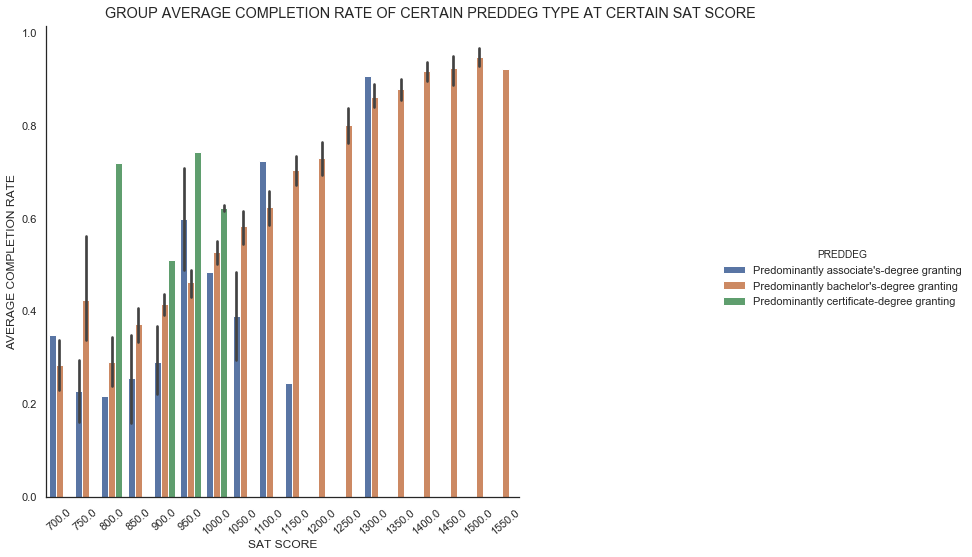

In [23]:
ds=df[df['SATCMMID']>=700][df['SATCMMID']<=1600].groupby(['SATCMMID','PREDDEG'])['COMPLETION RATE'].mean()
ds=pd.DataFrame(ds)
temp=[]
for index,value in ds.iterrows():
    temp.append([index[0],index[1],value.values[0]])
ds=pd.DataFrame(temp,columns=['SAT SCORE','PREDDEG','AVERAGE COMPLETION RATE'])
ds['SAT SCORE']= new_sat_score(ds,'SAT SCORE')
ax=sns.catplot(x="SAT SCORE", y="AVERAGE COMPLETION RATE", hue="PREDDEG", kind="bar", data=ds)
ax.set_xticklabels(rotation=40)
ax.fig.suptitle('GROUP AVERAGE COMPLETION RATE OF CERTAIN PREDDEG TYPE AT CERTAIN SAT SCORE')
ax.fig.set_size_inches(15,8)

Using the group average Completion Rate of certain preddeg type at certain SAT score, we can know the best choice of Predominant undergraduate degree awarded school type at certain SAT score. The black vertical line shows the range of completion rate. 

In [24]:
#get the answer of this question
result=pd.DataFrame({'mean' : ds.groupby(['SAT SCORE','PREDDEG'])['AVERAGE COMPLETION RATE'].mean()}).reset_index()
result2=pd.DataFrame({'max mean' : result.groupby(['SAT SCORE'])['mean'].max()}).reset_index()
result3=result.set_index('SAT SCORE').join(result2.set_index('SAT SCORE'))
result4=result3[result3['mean']==result3['max mean']]
result4=result4['PREDDEG']
result4

SAT SCORE
700.0     Predominantly associate's-degree granting
750.0      Predominantly bachelor's-degree granting
800.0     Predominantly certificate-degree granting
850.0      Predominantly bachelor's-degree granting
900.0     Predominantly certificate-degree granting
950.0     Predominantly certificate-degree granting
1000.0    Predominantly certificate-degree granting
1050.0     Predominantly bachelor's-degree granting
1100.0    Predominantly associate's-degree granting
1150.0     Predominantly bachelor's-degree granting
1200.0     Predominantly bachelor's-degree granting
1250.0     Predominantly bachelor's-degree granting
1300.0    Predominantly associate's-degree granting
1350.0     Predominantly bachelor's-degree granting
1400.0     Predominantly bachelor's-degree granting
1450.0     Predominantly bachelor's-degree granting
1500.0     Predominantly bachelor's-degree granting
1550.0     Predominantly bachelor's-degree granting
Name: PREDDEG, dtype: object

Above form is the result of best choice of Predominant undergraduate degree awarded school type using certain SAT Score.

# Question 7:

What size of school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?


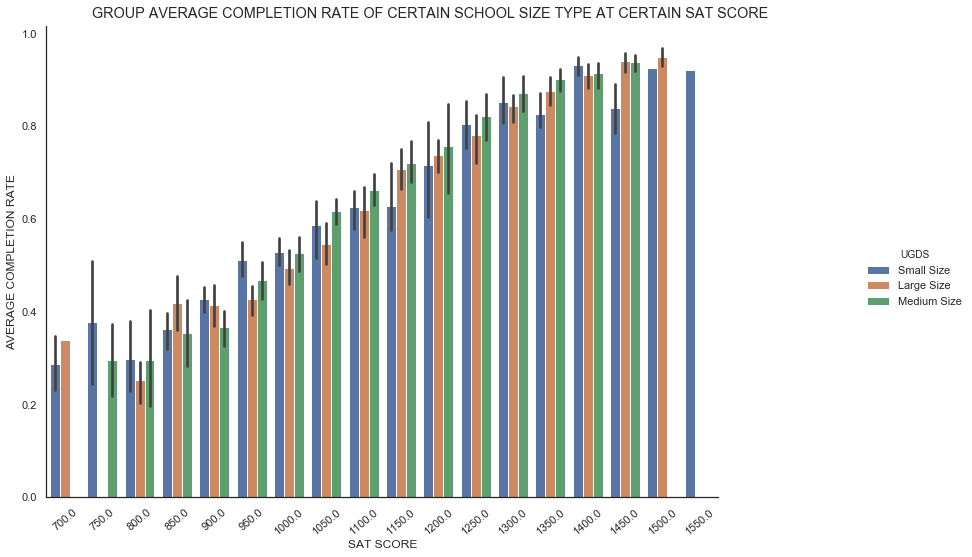

In [25]:
ds=df[df['SATCMMID']>=700][df['SATCMMID']<=1600].groupby(['SATCMMID','UGDS'])['COMPLETION RATE'].mean()
ds=pd.DataFrame(ds)
temp=[]
for index,value in ds.iterrows():
    temp.append([index[0],index[1],value.values[0]])
ds=pd.DataFrame(temp,columns=['SAT SCORE','UGDS','AVERAGE COMPLETION RATE'])
ds['SAT SCORE']= new_sat_score(ds,'SAT SCORE')
ax=sns.catplot(x="SAT SCORE", y="AVERAGE COMPLETION RATE", hue="UGDS", kind="bar", data=ds)
ax.set_xticklabels(rotation=40)
ax.fig.suptitle('GROUP AVERAGE COMPLETION RATE OF CERTAIN SCHOOL SIZE TYPE AT CERTAIN SAT SCORE')
ax.fig.set_size_inches(15,8)

Using the group average Completion Rate of certain control type at certain SAT score, we can know the best choice of school size at certain SAT score. The black vertical line shows the range of completion rate. 

In [26]:
#get the answer of this question
result=pd.DataFrame({'mean' : ds.groupby(['SAT SCORE','UGDS'])['AVERAGE COMPLETION RATE'].mean()}).reset_index()
result2=pd.DataFrame({'max mean' : result.groupby(['SAT SCORE'])['mean'].max()}).reset_index()
result3=result.set_index('SAT SCORE').join(result2.set_index('SAT SCORE'))
result4=result3[result3['mean']==result3['max mean']]
result4=result4['UGDS']
result4

SAT SCORE
700.0      Large Size
750.0      Small Size
800.0      Small Size
850.0      Large Size
900.0      Small Size
950.0      Small Size
1000.0     Small Size
1050.0    Medium Size
1100.0    Medium Size
1150.0    Medium Size
1200.0    Medium Size
1250.0    Medium Size
1300.0    Medium Size
1350.0    Medium Size
1400.0     Small Size
1450.0     Large Size
1500.0     Large Size
1550.0     Small Size
Name: UGDS, dtype: object

Above form is the result of best choice of school size using certain SAT Score.

# Question 8:

What kind of school should one student choose to study since he/she will highly likely to graduate easily and on-time according to his/her SAT score?


In [27]:
temp_df=df.copy()
temp_df['SATCMMID']=new_sat_score(temp_df,'SATCMMID')
choice=pd.DataFrame()
choice['SAT Score']=np.sort(temp_df['SATCMMID'].unique())
choice['BEST CHOICE']=choice['SAT Score'].apply(easy_graduate)
pd.set_option('display.max_colwidth', -1)
choice

,SAT Score,BEST CHOICE
0,700.0,"A private nonprofit, small size, predominantly associate's-degree granting school."
1,750.0,"A private nonprofit, small size, predominantly bachelor's-degree granting school."
2,800.0,"A private nonprofit, small size, predominantly certificate-degree granting school."
3,850.0,"A private nonprofit, large size, predominantly bachelor's-degree granting school."
4,900.0,"A private for-profit, small size, predominantly bachelor's-degree granting school."
5,950.0,"A private nonprofit, small size, predominantly certificate-degree granting school."
6,1000.0,"A private nonprofit, small size, predominantly certificate-degree granting school."
7,1050.0,"A private for-profit, medium size, predominantly bachelor's-degree granting school."
8,1100.0,"A private nonprofit, large size, predominantly bachelor's-degree granting school."
9,1150.0,"A private nonprofit, large size, predominantly bachelor's-degree granting school."


Using the group average Completion Rate of same School Size, Control type and Preddege type school, the form above gives out the best choice using certain SAT Score.

# Question 9:

What kind of school should one student apply since he/she will highly likely to get a offer easily according to his/her SAT score?

# Import full dataset

In [28]:
#Since we are going to use the admission rate of each college which only contained by the full dataset, we have to import
#the dataset again
college_path_all = os.path.join('data', 'MERGED2016_17_PP real.csv')
college_all = pd.read_csv(college_path_all)
college_all.head(5)

C:\Users\Hank\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1431,1432,1503,1504,1517,1518,1519,1529,1530,1532,1534,1535,1537,1538,1539,1540,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1610,1611,1614,1615,1616,1708,1729,1909,1910,1911,1912,1913) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Same data cleaning and prepare processes in the first part
df=college_all[['OPEID','CONTROL','UGDS','PREDDEG','SATVR25', 'SATVR75',\
           'SATMT25','SATMT75','SATVRMID','SATMTMID',\
            "ADM_RATE"]].dropna(subset=['SATVR25', 'SATVR75',\
           'SATMT25','SATMT75','SATVRMID','SATMTMID']).\
            replace('PrivacySuppressed',0).fillna(0)
df['SATCM25'] = df['SATVR25'] + df['SATMT25'] 
df['SATCM75'] = df['SATVR75'] + df['SATMT75'] 
df['SATCMMID'] = df['SATVRMID'] + df['SATMTMID'] 
df['UGDS']=pd.qcut(df['UGDS'],3,labels=['Small Size','Medium Size','Large Size'])
df['CONTROL']=df['CONTROL'].map(dic['CONTROL'])
df['PREDDEG']=df['PREDDEG'].map(dic['PREDDEG'])
df['SATCMMID']=new_sat_score(df,'SATCMMID')
df=df.dropna(subset=['SATCMMID'])
df.head(5)

,OPEID,CONTROL,UGDS,PREDDEG,SATVR25,SATVR75,SATMT25,SATMT75,SATVRMID,SATMTMID,ADM_RATE,SATCM25,SATCM75,SATCMMID
0,100200,Public,Large Size,Predominantly bachelor's-degree granting,380.0,470.0,370.0,470.0,425.0,420.0,0.8738,750.0,940.0,800.0
1,105200,Public,Large Size,Predominantly bachelor's-degree granting,480.0,640.0,490.0,660.0,560.0,575.0,0.5814,970.0,1300.0,1100.0
3,105500,Public,Large Size,Predominantly bachelor's-degree granting,520.0,660.0,540.0,680.0,590.0,610.0,0.7628,1060.0,1340.0,800.0
4,100500,Public,Large Size,Predominantly bachelor's-degree granting,370.0,460.0,360.0,460.0,415.0,410.0,0.4590,730.0,920.0,1100.0
5,105100,Public,Large Size,Predominantly bachelor's-degree granting,490.0,610.0,490.0,620.0,550.0,555.0,0.5259,980.0,1230.0,900.0


# Variable Name Note

In this new dataset, we have ADM_RATE which is the admission rate of this college.

In [30]:
choice=pd.DataFrame()
choice['SAT Score']=np.sort(df['SATCMMID'].unique())
choice['BEST CHOICE']=choice['SAT Score'].apply(easy_apply)

In [31]:
pd.set_option('display.max_colwidth', -1)
choice

,SAT Score,BEST CHOICE
0,700.0,"A public, large size, predominantly bachelor's-degree granting school."
1,750.0,"A public, medium size, predominantly bachelor's-degree granting school."
2,800.0,"A public, large size, predominantly bachelor's-degree granting school."
3,850.0,"A private nonprofit, small size, predominantly bachelor's-degree granting school."
4,900.0,"A public, medium size, predominantly associate's-degree granting school."
5,950.0,"A public, medium size, predominantly bachelor's-degree granting school."
6,1000.0,"A private nonprofit, small size, predominantly associate's-degree granting school."
7,1050.0,"A public, medium size, predominantly associate's-degree granting school."
8,1100.0,"A public, medium size, predominantly bachelor's-degree granting school."
9,1150.0,"A private nonprofit, small size, predominantly bachelor's-degree granting school."


Using the group average Admission Rate of same School Size, Control type and Preddege type school, this form gives out the best choice for applying school using certain SAT Score.

# Question 10

What average annual net-cost of attendance in college would applicants expect to pay according to his/her SAT score?

In [32]:
#For this question, we need a new dataset which contains the average cost per year for one college
df=college_all[['OPEID','CONTROL','UGDS','PREDDEG',\
           'SATVRMID','SATMTMID',\
            "NPT4_PUB","NPT4_PRIV"]].dropna(subset=['SATVRMID','SATMTMID']).\
            replace('PrivacySuppressed',0).fillna(0)
df['SATCMMID'] = df['SATVRMID'] + df['SATMTMID'] 
df['Average_Cost']=df["NPT4_PUB"]+df["NPT4_PRIV"]
df=df.replace(0,np.NaN).dropna(subset=['Average_Cost'])
df['SATCMMID']=new_sat_score(df,'SATCMMID')
df=df.dropna(subset=['SATCMMID'])
df.head(5)

,OPEID,CONTROL,UGDS,PREDDEG,SATVRMID,SATMTMID,NPT4_PUB,NPT4_PRIV,SATCMMID,Average_Cost
0,100200,1,4616.0,3,425.0,420.0,15567.0,NaN,800.0,15567.0
1,105200,1,12047.0,3,560.0,575.0,16475.0,NaN,1100.0,16475.0
3,105500,1,6346.0,3,590.0,610.0,19423.0,NaN,800.0,19423.0
4,100500,1,4704.0,3,415.0,410.0,15037.0,NaN,1100.0,15037.0
5,105100,1,31663.0,3,550.0,555.0,21676.0,NaN,900.0,21676.0


Note:
    NPT4_PUB: Average Cost per year for public school
    NPT4_PRIV: Average Cost per year for private school

In [33]:
choice=pd.DataFrame()
choice['SAT Score']=np.sort(df['SATCMMID'].unique())
choice['Expect_Cost_Per_Year']=choice['SAT Score'].apply(expect_tuition)
choice=choice.dropna()
choice

,SAT Score,Expect_Cost_Per_Year
0,700.0,12645.000000
1,750.0,19048.666667
2,800.0,15109.142857
3,850.0,19604.000000
4,900.0,19492.950000
5,950.0,20190.985294
6,1000.0,19050.319149
7,1050.0,21120.509804
8,1100.0,19981.264706
9,1150.0,19060.692308


This form above gives the expected annual net-cost of college for applicants with different sat scores.

# Question 11

What is the probability that an applicant can graduate on-time from college based on his/her SAT score?

In [34]:
#For this question, we are importing the new dataset which contain the on-time completion rate for each college 
df=college_all[['OPEID','CONTROL','UGDS','PREDDEG',\
           'SATVRMID','SATMTMID',\
            "C150_4"]].dropna(subset=['SATVRMID','SATMTMID','C150_4']).\
            replace('PrivacySuppressed',0).fillna(0)
df['SATCMMID'] = df['SATVRMID'] + df['SATMTMID'] 
df['SATCMMID']=new_sat_score(df,'SATCMMID')
df=df.dropna(subset=['SATCMMID'])
df.head(5)

,OPEID,CONTROL,UGDS,PREDDEG,SATVRMID,SATMTMID,C150_4,SATCMMID
0,100200,1,4616.0,3,425.0,420.0,0.2749,800.0
1,105200,1,12047.0,3,560.0,575.0,0.5309,1100.0
3,105500,1,6346.0,3,590.0,610.0,0.4867,800.0
4,100500,1,4704.0,3,415.0,410.0,0.2165,1100.0
5,105100,1,31663.0,3,550.0,555.0,0.6871,900.0


Note:
    C150_4: the on-time completion rate

In [35]:
choice=pd.DataFrame()
choice['SAT Score']=np.sort(df['SATCMMID'].unique())
choice['Expect_Completion_Rate']=choice['SAT Score'].apply(expect_completion_rate)
choice=choice.dropna()
choice

,SAT Score,Expect_Completion_Rate
0,700.0,87.925%
1,750.0,52.42%
2,800.0,46.51285714285714%
3,850.0,54.68142857142857%
4,900.0,54.454418604651146%
5,950.0,56.36741379310345%
6,1000.0,55.33844827586204%
7,1050.0,55.88121951219512%
8,1100.0,55.219666666666654%
9,1150.0,54.274347826086945%


This form above indicates the average on-time gradution rate for applicants with different SAT scores.

# Conclusion:

---

**This project focuses on the relationship between students’ SAT scores at admission and their subsequent probability of completion within 150% of the expected completion time. These probability are further broken down by the school types, degree types, and school sizes by undergraduate enrollment, respectively. It is observed that as students’ SAT score increases, their chances of completion also increases linearly. Higher SAT score students tend to attend private nonprofit, predominantly bachelor’s degree granting universities regardless of school size, while lower score students prefer private nonprofit, small size, predominantly bachelor’s degree granting universities. These choices would maximize their completion rate within 150% of their expected graduation. However, this analysis is conducted on a rather small sample size of around 1200, because only these many data regarding SAT scores were provided. Also, most of the schools that provided their scores are predominantly bachelor’s degree granting. This might be due to that other degrees granting schools do not require the SAT score, such as some associate’s degree granting schools and graduate’s degree granting schools. Moreover, there might be many other confounding factors regarding  students’ completion rate, such as amount of student loan, cost of tuition, whether a student had transferred, etc. From such a small sample size, this analysis is only a suggested indicative summary of the kind of institution that a student most likely will attend based on their SAT scores to maximize their completion rate.**


# Ethical Considerations: 


The problem which this project intends to solve does not involve too many ethical concerns. Since it is the dataset published by the US government into publicity and it has a lot of null values which represent the privacy some school wants to keep, there should be no ethical problem of this project. The study's goal of this project is to help general college applicants to choose their fittable college only. Lots of detailed information of School like the average earning of students graduated from each school is no longer available to protect each school's privacy.


## Ethical concerns of consider the whole data science process

The collected data are extracted from the U.S. Department of Education, which is a open source and give all access to viewers. Every school has the liberty to submit their data to the data source. Certainly, some schools choose to decline to provide such information to the Department of Education, and those schools are marked NAN in the original data, which we delete out during the data cleaning. The problems we researched and the analysis of each question do not have the potential of leaking any kind of privacy informations. The conclusions are not personally point any kind of schools which are discussed in the topic. The reference to the data was clear and legitimate.


Done! Thank you for reading.